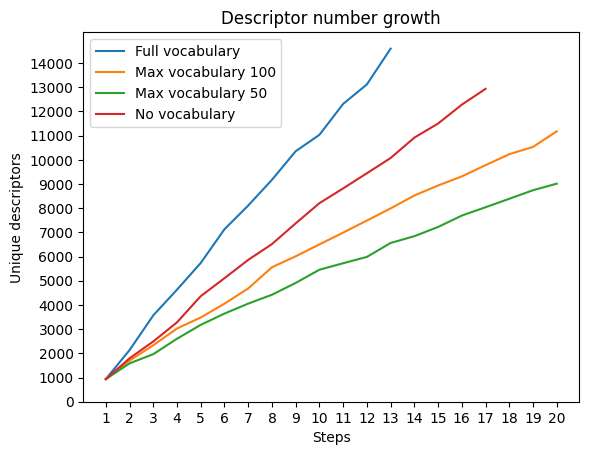

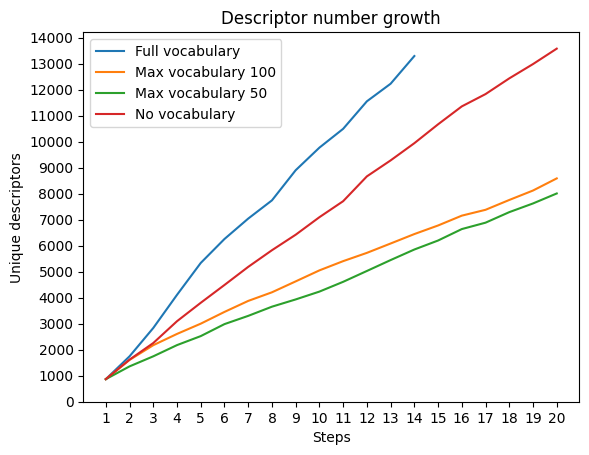

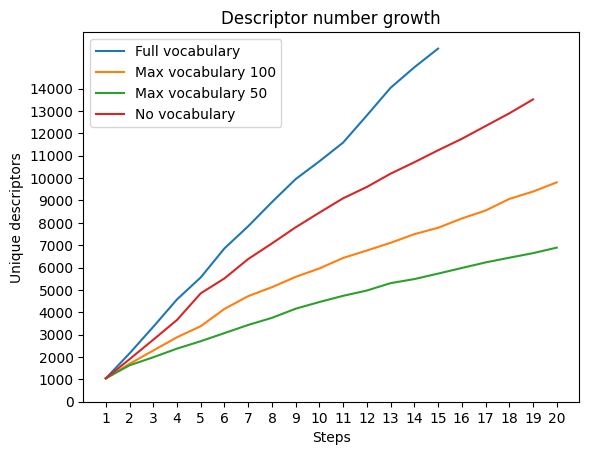

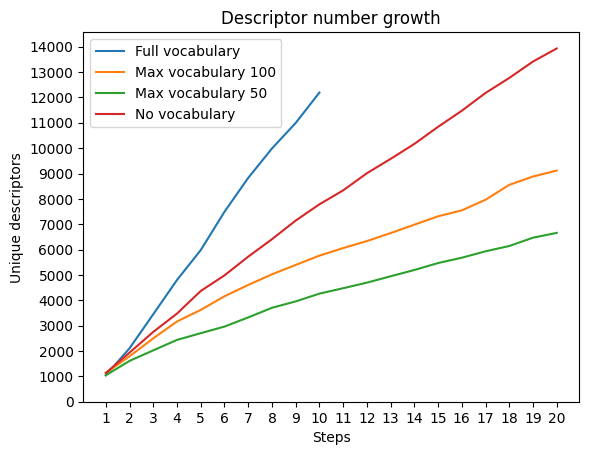

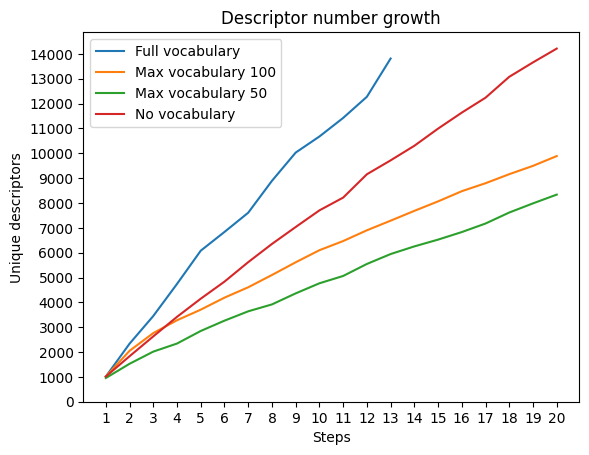

In [1]:
import os
import matplotlib.pyplot as plt

# Directory containing the files
data_dir = '../data/desc_growth'

# Function to read the contents of a file into a list
def read_file(file_path):
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

# Get the list of files in the directory
files = sorted([f for f in os.listdir(data_dir)])

# Read the contents of the files in batches of 3
for i in range(0, len(files), 4):
    batch_files = files[i:i+4]
    data = [read_file(os.path.join(data_dir, f)) for f in batch_files]
    
    descriptive_labels = ['Full vocabulary', 'Max vocabulary 100', 'Max vocabulary 50', 'No vocabulary']
    for j, d in enumerate(data):
        plt.plot(d, label=descriptive_labels[j])
        plt.xticks(ticks=range(20), labels=range(1, 21))
        plt.yticks(ticks=range(0, 15000, 1000))
    plt.xlabel('Steps')
    plt.ylabel('Unique descriptors')
    plt.title('Descriptor number growth')
    plt.legend()
    plt.show()

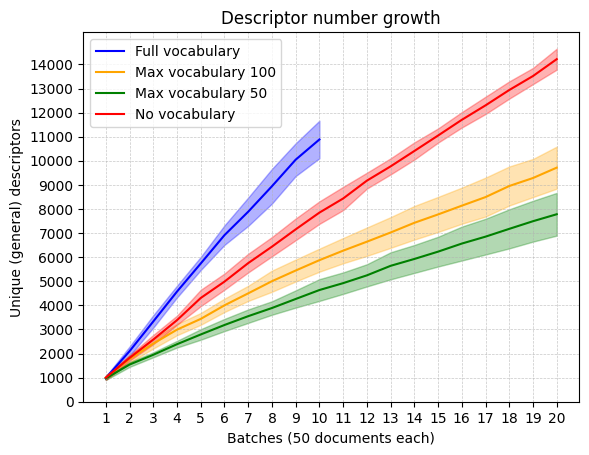

In [3]:
import os
import numpy as np

import matplotlib.pyplot as plt

# Directory containing the files
data_dir = '../data/desc_growth'

# Function to read the contents of a file into a list
def read_file(file_path):
    with open(file_path, 'r') as file:
        return [float(line.strip()) for line in file]

# Get the list of files in the directory
files = sorted([f for f in os.listdir(data_dir) if f.endswith('.txt')])

# Group files based on naming scheme
grouped_files = {
    'full-vocab': [],
    'max-vocab-100': [],
    'max-vocab-50': [],
    'no-vocab': []
}

for file in files:
    if 'full-vocab' in file:
        grouped_files['full-vocab'].append(file)
    elif 'max-vocab-100' in file:
        grouped_files['max-vocab-100'].append(file)
    elif 'max-vocab-50' in file:
        grouped_files['max-vocab-50'].append(file)
    elif 'no-vocab' in file:
        grouped_files['no-vocab'].append(file)

# Calculate average and variation for each group
grouped_data = {}
for group, file_list in grouped_files.items():
    data = [read_file(os.path.join(data_dir, f)) for f in file_list]
    
    # Truncate the lists to the length of the shortest list
    min_length = min(len(d) for d in data)
    truncated_data = [d[:min_length] for d in data]
    
    data = np.array(truncated_data)
    avg = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    grouped_data[group] = (avg, std, truncated_data)

# Plot the results
descriptive_labels = ['Full vocabulary', 'Max vocabulary 100', 'Max vocabulary 50', 'No vocabulary']
colors = ['b', 'orange', 'g', 'r']
for idx, label in enumerate(descriptive_labels):
    group_key = label.lower().replace(' ', '-').replace('vocabulary', 'vocab')
    avg, std, truncated_data = grouped_data[group_key]
    
    # Plot average with solid line
    plt.plot(avg, label=f'{label}', color=colors[idx])
    
    # Plot shaded area for variation
    plt.fill_between(range(len(avg)), avg - std, avg + std, color=colors[idx], alpha=0.3)
    
    plt.xticks(ticks=range(20), labels=range(1, 21))
    plt.yticks(ticks=range(0, 15000, 1000))

plt.xlabel('Batches (50 documents each)')
plt.ylabel('Unique (general) descriptors')
plt.title('Descriptor number growth')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)  # Add faint gridlines
plt.show()